

---

---




####After data processing and perform The requirements , The dataset is **ready** for  Build and develop the models (tasks)..


---

---






* **Task#1**: Clustering in an unsupervised fashion (K-means clustering)
* **Task#2**: Logistic/Linear Regression
* **Task#3**: Neural Network for Classification/Regression

# **Task1: Clustering in an unsupervised fashion (K-means clustering)**
######[**clustering**](https://en.wikipedia.org/wiki/Cluster_analysis) : is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).                           
or                                                                               
######[**clustering**](https://heartbeat.comet.ml/how-to-evaluate-clustering-based-models-in-python-503343816db2/) : is an unsupervised machine learning technique used to identify and group similar data points within a larger, unlabelled dataset. It refers to the process of finding a structure or pattern inside an otherwise unstructured dataset

######one of the main types of clustering is **Centroid-based Clustering (e.g., K-Means Clustering)** which I use it in my task .

######[**K-Means Clustering**](https://https://heartbeat.comet.ml/how-to-evaluate-clustering-based-models-in-python-503343816db2) :  is an **unsupervised machine learning algorithm** that groups unlabeled data into k number clusters, where k is a user-defined integer. K-means is an iterative algorithm that makes use of cluster centroids to divide the data in a way that groups similar data into groups.

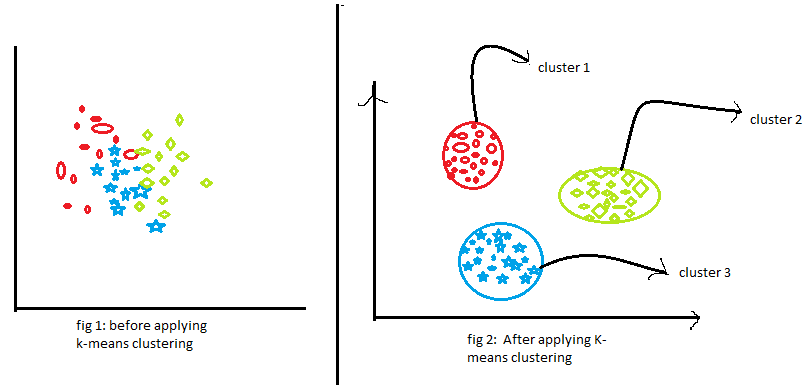

After we can noticed the plotting the error rate appears significantly, as the groups are greatly overlapping, and this is evidence that the data is **not ready enough to be entered into the model** .
and lack the  processing  like ( normalization /standarization or dimensionality reduction ), in many cases may require removing the outliers.  
**Therefore**, my notes cannot be accessed through a Moodle built in this way, and needs processing and understanding The data for every fields.



## **After processing (PCA & Scaling)**

In [ ]:
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [ ]:
#copy the variable from X_train_pca and X_test_pca
X_train_pca1=X_train_pca.copy()
X_test_pca1=X_test_pca.copy()

**Now** , after data being ready for perform the model then to determine the correct number of clusters we will make use of the **elbow method**.  

**X_train_pca1** will contain information about more important featuers in boston dataset and I use **X_train_pca1**, and try to divide the dataset into different clusters using K-means instead. Below, I use the elbow method to find the value of **k** .

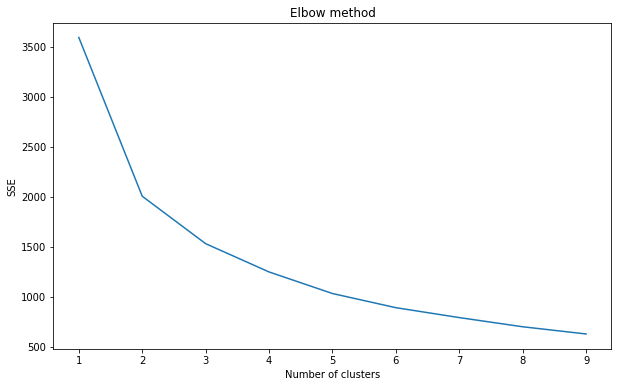

 				 elbow method Done...! 				


In [ ]:
# sse: sum of distance all point of culter and their centroid
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_pca1)
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center

#plotting the elbow method
plt.figure(figsize=(10,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()
print("","="*100," \n \t\t\t\t elbow method Done...! \t\t\t\t\n","="*100)

The elbow method has given us an optimal value of k that is **almost four clusters**.
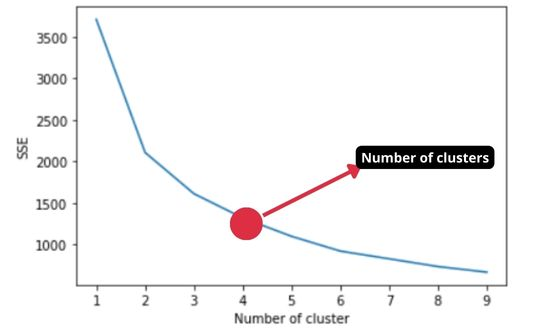

Also we can use the [**silhouette plot :** ](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)     which displays a measure of how **close each point in one cluster is to points in the neighboring clusters** and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

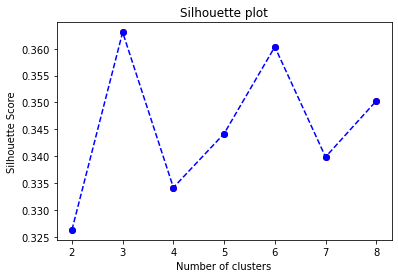

 				 Silhouette plot Done...! 				


In [ ]:
silhouette_scores = []

for n_cluster in range(3, 10):
    silhouette_scores.append(silhouette_score(X_train_pca1, KMeans(n_clusters = n_cluster).fit_predict(X_train_pca1)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7,8]
#plt.figure(figsize=(10,6))
plt.title("Silhouette plot")
plt.plot(k, silhouette_scores, '--ob')
plt.scatter(k, silhouette_scores,color='r')
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()
print("","="*100," \n \t\t\t\t Silhouette plot Done...! \t\t\t\t\n","="*100)

The  **silhouette_scores** represents how well the data point has been clustered, and scores **above 0 are seen as good** and there maybe when looking at the third or fiveth cluster may found the silhouette_scores the greatest score , and here I choose the optimal value of k that is almost **four clusters** anf then evalute the model with this number of k.

###**Let’s use this value to build a model.**

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=100,  n_init=500).fit(X_train_pca1)
# n_clusters : The number of clusters to form as well as the number of centroids to generate.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run.
# n_init : Number of times the k-means algorithm is run with different centroid seeds.
print("","="*100," \n \t\t\t\t K-means Algorithm Done...! \t\t\t\t\n","="*100)

 				 K-means Algorithm Done...! 				


In [ ]:
# Adding the 'kmeans.labels_' to 'X_train_pca1 data frame' as a column
if "Clusters" not in X_train_pca1:
  X_train_pca1["Clusters"] = kmeans.labels_
X_train_pca1

,P1,P2,P3,P4,P5,Clusters
0,-1.648974,0.021591,-1.273739,0.089720,-0.830904,1
1,4.203886,0.826954,-0.184688,0.345148,0.180703,0
2,-0.089852,-1.204285,-0.430616,-0.566945,-0.126991,1
3,-2.459325,0.605754,0.953015,-0.350154,0.671776,2
4,2.974754,0.849244,1.650239,-0.279261,-1.425614,0
...,...,...,...,...,...,...
338,2.812027,-2.297557,-0.791137,-0.808231,3.175165,0
339,2.683602,-1.042976,1.553335,3.676643,-0.663386,3
340,0.908952,-0.869522,1.168289,-1.142270,1.319399,1
341,-1.297118,-0.862607,0.868694,-0.870730,-0.410287,1


Plotting the data in the **tow dimension [2D]** to add more visualization to it

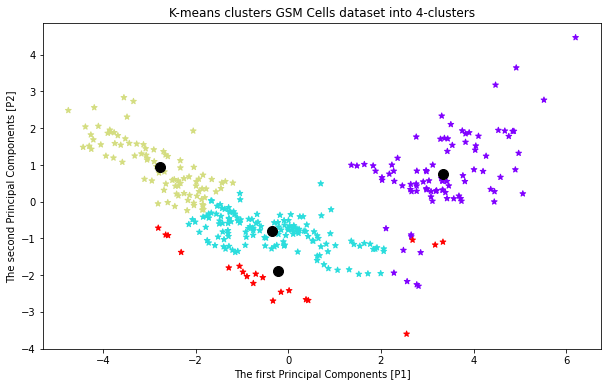

In [ ]:
#plot the data points for the first two components
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca1['P1'], X_train_pca1['P2'], c= X_train_pca1["Clusters"],cmap='rainbow' , marker='*')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100,c='black')

# naming the x axis
plt.xlabel('The first Principal Components [P1]')

# naming the y axis
plt.ylabel('The second Principal Components [P2]')

#Adding the title
plt.title("K-means clusters GSM Cells dataset into 4-clusters");

Plotting the data in the **three dimension [3D]** to add more visualization to it

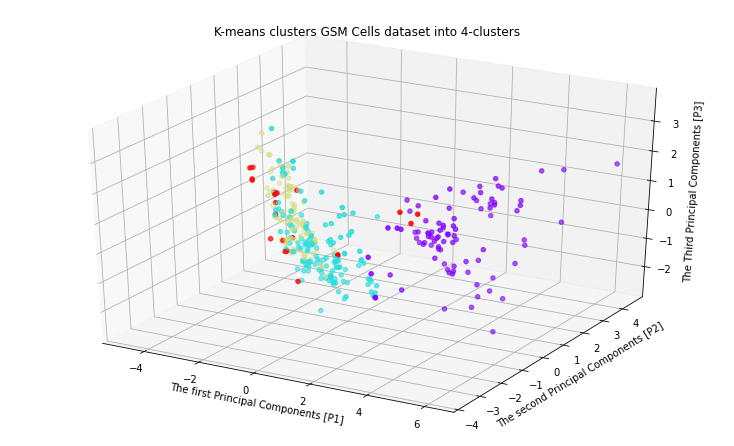

In [ ]:
# keep 3 dimentions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
ax.scatter(X_train_pca1["P1"],X_train_pca1["P2"], X_train_pca1["P3"],c= X_train_pca1["Clusters"], marker='o',cmap='rainbow')

# naming the x axis
plt.xlabel('The first Principal Components [P1]')

# naming the y axis
plt.ylabel('The second Principal Components [P2]')

# naming the Z axis
ax.set_zlabel("The Third Principal Components [P3]")

#Adding the title
plt.title("K-means clusters GSM Cells dataset into 4-clusters")
plt.show();




####**print the correlation between pca features and target**


---



In [ ]:
X_train_pca11=X_train_pca1
X_train_pca11['target']= pd.DataFrame(y_train_pca).values

In [ ]:
X_train_pca11

,P1,P2,P3,P4,P5,Clusters,target
0,-1.648974,0.021591,-1.273739,0.089720,-0.830904,1,21.1
1,4.203886,0.826954,-0.184688,0.345148,0.180703,0,5.6
2,-0.089852,-1.204285,-0.430616,-0.566945,-0.126991,1,19.4
3,-2.459325,0.605754,0.953015,-0.350154,0.671776,2,32.0
4,2.974754,0.849244,1.650239,-0.279261,-1.425614,0,15.0
...,...,...,...,...,...,...,...
338,2.812027,-2.297557,-0.791137,-0.808231,3.175165,0,11.8
339,2.683602,-1.042976,1.553335,3.676643,-0.663386,3,22.7
340,0.908952,-0.869522,1.168289,-1.142270,1.319399,1,25.0
341,-1.297118,-0.862607,0.868694,-0.870730,-0.410287,1,29.9


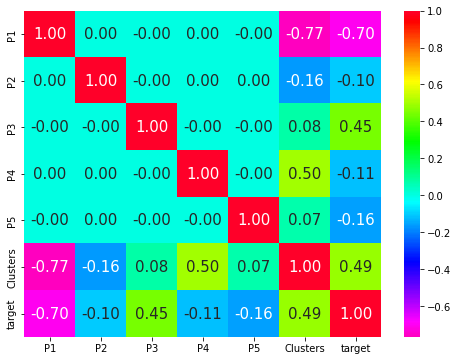

In [ ]:
import seaborn as sns
corr = X_train_pca11.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='gist_rainbow_r');


When looking at the correlation between PCA features and Clusters with Target (Price), we find that the correlation is **almost non-existent , very weak**, and since the dataset that I worked on **cannot be resolved by unsupervised learning** (K-means clustering)

And we should use **supervised learning** to make a regression and prediction.


---



---



It might be a good information that you can use with   [**KMeans :**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.htmlMethod )
many methods like **fit** and **predict** , The deffrince :
* **fit** : Compute k-means clustering.
* **predict** : Predict the closest cluster each sample in X belongs to   

**And now I use the predict with X_test Pca1 to predict each data sample in it for which clusters belongs to**

In [ ]:
#convert the X_test_pca1 to dataframe with clusters columns
label_test=kmeans.fit_predict(X_test_pca1)
X_test_pca1=pd.DataFrame(X_test_pca1)
X_test_pca1.columns=X_train_pca1.columns[:-2]
X_test_pca1['Clusters']=label_test
X_test_pca1
print("","="*100," \n \t\t\t\t Predict for testing Done...! \t\t\t\t\n","="*100)

 				 Predict for testing Done...! 				


**Now** , that I have my labels and predictions let’s evaluate this model to find out well it performed!

**Then**, I would plot the testing data with training to make it more clear and show which cluster the model predicts for each data sample in testing data according to training data clustering .

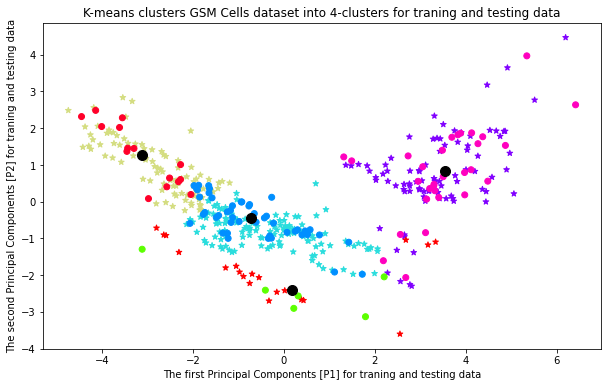

In [ ]:
plt.figure(figsize=(10, 6));
#plot the data points for the first two components
plt.scatter(X_train_pca1['P1'], X_train_pca1['P2'], c= X_train_pca1["Clusters"],cmap='rainbow' , marker='*') #traning data
plt.scatter(X_test_pca1["P1"],X_test_pca1["P2"],c=X_test_pca1["Clusters"],marker='o',cmap='gist_rainbow_r') #testing data

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100,c='black')

# naming the x axis
plt.xlabel('The first Principal Components [P1] for traning and testing data')

# naming the y axis
plt.ylabel('The second Principal Components [P2] for traning and testing data')

#Adding the title
plt.title("K-means clusters GSM Cells dataset into 4-clusters for traning and testing data");

**Now** , I think it is always a better idea to **evaluate my machine learning models** before making decisions based on them,
 **Metric evaluation** is an easy-to-interpret solution for checking the performance of the model.                                                        
 often by identifying clusters of data with similar (but independent) features. Now, I will discuss different clustering algorithms and how to evaluate their results. Let’s get started !                                                    
 **Evaluation Metrics For Clustering-Based Models**
 * Normalized Mutual Information
 * Davies Bouldin index
 * Silhouette Score
 * Calinski Harabaz Index
 * pinning the target and observing the results



---



 * ### **Davies Bouldin index**
 is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.


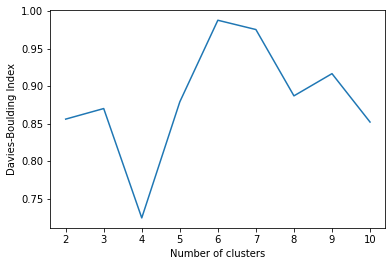

In [ ]:
from sklearn.metrics import davies_bouldin_score
results = {}
for i in range(2,11):
    kmeans1 = KMeans(n_clusters=i, random_state=30)
    labels = kmeans1.fit_predict(X_test_pca1)
    db_index = davies_bouldin_score(X_test_pca1, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()
# we can still observe that choosing 4 clusters minimizes the similarity measure.

In [ ]:
# where similarity is the ratio of within-cluster distances to between-cluster distances.
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_test_pca1,label_test)

0.7242986535338589

When looking at the plotting where a smaller value represents a better model that produces better clusters and here the **fourth cluster** represent the smaller value of Davies-Boulding Index .

* ### **Silhouette Score**
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm by taking the mean distance from intra-cluster and nearest cluster samples.                                                                
The closer the value of the silhouette score to 1 the **better-separated** the clusters.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_score(X_test_pca1,label_test)

0.4825158120898574

silhouette score is **0.486** which is acceptable and shows clusters are not overlapping.

* ### **Calinski Harabaz Index**
is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.                                                      
The higher the index the **more separable** the clusters.

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X_test_pca1,label_test)

85.54872302518054

* ### **pinning the target**
By spliting The dataset into classes with observation 5 classes :              

*   Home prices range from 0 to 9.

*   Home prices range from 9 to 19.

*   Home prices range from 19 to 29.

*   Home prices range from 29 to 39.

*   Home prices range from 39 to 50.





In [ ]:
# adding the target column to dataset traning
X_test_pca11=X_test_pca1
X_test_pca11['target']= pd.DataFrame(y_test_pca).values
Pca_classifair=X_train_pca11

update the target value to (0 or 1 or 2 or 3 or 4 or 5), which means that the houses with prices between 0 and 9 are in the same group with class labeled 0, etc.....

In [ ]:
# update the target value to (0 or 1 or 2 or 3 or 4 or 5)
Pca_classifair['target']=np.where((Pca_classifair['target']>=0 ) & (Pca_classifair['target']<=9),0,Pca_classifair['target'])
Pca_classifair['target']=np.where((Pca_classifair['target']>9 ) & (Pca_classifair['target']<=19),1,Pca_classifair['target'])
Pca_classifair['target']=np.where((Pca_classifair['target']>19 ) & (Pca_classifair['target']<=29),2,Pca_classifair['target'])
Pca_classifair['target']=np.where((Pca_classifair['target']>29 ) & (Pca_classifair['target']<=39),3,Pca_classifair['target'])
Pca_classifair['target']=np.where((Pca_classifair['target']>39 ) & (Pca_classifair['target']<=50),4,Pca_classifair['target']);

In [ ]:
#show the data frame
Pca_classifair

,P1,P2,P3,P4,P5,Clusters,target
0,-1.648974,0.021591,-1.273739,0.089720,-0.830904,1,2.0
1,4.203886,0.826954,-0.184688,0.345148,0.180703,0,0.0
2,-0.089852,-1.204285,-0.430616,-0.566945,-0.126991,1,2.0
3,-2.459325,0.605754,0.953015,-0.350154,0.671776,2,3.0
4,2.974754,0.849244,1.650239,-0.279261,-1.425614,0,1.0
...,...,...,...,...,...,...,...
338,2.812027,-2.297557,-0.791137,-0.808231,3.175165,0,1.0
339,2.683602,-1.042976,1.553335,3.676643,-0.663386,3,2.0
340,0.908952,-0.869522,1.168289,-1.142270,1.319399,1,2.0
341,-1.297118,-0.862607,0.868694,-0.870730,-0.410287,1,3.0


Now, after preparing the data frame with replace the target with classes we can consider this a **(Y)** and clusters labels are a **y predicted** , then we can:
* compute confusion matrix to evaluate the accuracy of a classification.
* Build a text report showing the main classification metrics.
* Accuracy classification score.

In [ ]:
#perform the confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion_matrix : \n\n',confusion_matrix(Pca_classifair['target'],Pca_classifair['Clusters']))
print('='*100)
#the main classification metrics
print('classification_report: \n\n',classification_report(Pca_classifair['target'],Pca_classifair['Clusters']))
print('='*100)
#Accuracy classification
print('accuracy_score \n\n :',accuracy_score(Pca_classifair['target'],Pca_classifair['Clusters']));

confusion_matrix : 

 [[15  0  0  0  0]
 [51 38  9  3  0]
 [24 80 52 13  0]
 [ 1 18 26  4  0]
 [ 0  6  3  0  0]]
classification_report: 

               precision    recall  f1-score   support

         0.0       0.16      1.00      0.28        15
         1.0       0.27      0.38      0.31       101
         2.0       0.58      0.31      0.40       169
         3.0       0.20      0.08      0.12        49
         4.0       0.00      0.00      0.00         9

    accuracy                           0.32       343
   macro avg       0.24      0.35      0.22       343
weighted avg       0.40      0.32      0.32       343

accuracy_score 

 : 0.3177842565597668


* ### **Normalized Mutual Information**
[Normalized Mutual Information (NMI) : ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation) , and can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(Pca_classifair['target'],Pca_classifair['Clusters'])

0.15086744670624896

## **Before processing (PCA & Scaling)**

In [ ]:
X_train1=X_train
X_test1=X_test

* ### **Determine the correct number of clusters :**

1.  **elbow method.**



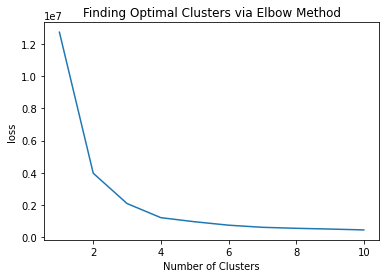

In [ ]:
loss =[]
for i in range(1, 11):
  km = KMeans(n_clusters = i).fit(X_train1)
  loss.append(km.inertia_)
#printing loss against number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), loss)
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()

The elbow method has given us an optimal value of k that is almost Three clusters.
2.  **Silhouette Method**



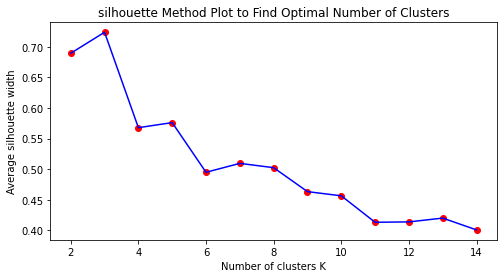

In [ ]:
# Silhouette Method
sil = []
# Number of clusters in range 2-10
K = range(2, 15,1)
from sklearn.metrics import silhouette_score
for n in K:
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X_train1)
    labels = algorithm.labels_
    sil.append(silhouette_score(X_train1, labels, metric = 'euclidean'))
plt.figure(figsize=(8,4))
plt.scatter(K,sil,c="r")
plt.plot(K,sil,'b-')
plt.title('silhouette Method Plot to Find Optimal Number of Clusters')
plt.xlabel('Number of clusters K')
plt.ylabel('Average silhouette width')
plt.show()

The  **silhouette_scores** represents how well the data point has been clustered, and scores **above 0 are seen as good**  , here I choose the optimal value of k that is almost **three clusters** anf then evalute the model with this number of k.

###**Let’s use this value to build a model.**

In [ ]:
#now performing the clustering
clust=KMeans(n_clusters=3,max_iter=500,init='k-means++').fit(X_train1)

#now extract the clusterCenters
clusterCenter=clust.cluster_centers_

#convert clusterCenter to dataframe to do the cluster profilin
ccd=pd.DataFrame(clusterCenter,columns=X_train1.columns)
#ccd for cluster profilin
ccd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.383808,1.577255e+01,8.332275,6.666667e-02,0.509498,6.35902,61.433333,4.494627,4.478431,311.396078,17.815686,383.075216,10.560745
1,15.260224,0.000000e+00,17.777600,2.081668e-17,0.663560,6.09004,89.220000,2.066700,22.480000,644.200000,20.008000,48.493200,18.984400
2,11.054817,7.105427e-15,18.253016,4.761905e-02,0.671794,5.94181,89.473016,2.127229,23.682540,666.714286,20.198413,375.096349,18.520794


In [ ]:
#so profiling details
#clusterId 1 is having the highest crime rate
# industry are more in clusterId 1
#to see the labels i.e clusterId for each observation
labels=clust.labels_
X_train1['labels']=labels
X_train1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,labels
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,0
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,2
312,0.26169,0.0,9.90,0.0,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72,0
187,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68,0
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,0
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,2
165,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81,0
178,0.06642,0.0,4.05,0.0,0.510,6.860,74.4,2.9153,5.0,296.0,16.6,391.27,6.92,0


Plotting the data in the **tow dimension [2D]** to add more visualization to it

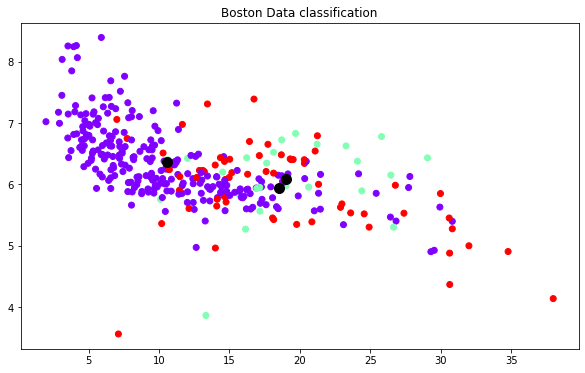

In [ ]:
#plot the data points
plt.figure(figsize=(10,6))
plt.scatter(X_train1['LSTAT'], X_train1['RM'], c= X_train1["labels"],cmap='rainbow' , marker='o')
#plot the centroids
plt.scatter(clust.cluster_centers_[:, 12],clust.cluster_centers_[:, 5], s=100,c='black')
plt.title('Boston Data classification')
plt.show()

After we can noticed the plotting the error rate appears significantly, as the groups are greatly overlapping, and this is evidence that the data is **not ready enough to be entered into the model** .
and lack the  processing  like ( normalization /standarization or dimensionality reduction ), in many cases may require removing the outliers.  
**Therefore**, my notes cannot be accessed through a Moodle built in this way, and needs processing and understanding The data for every fields.



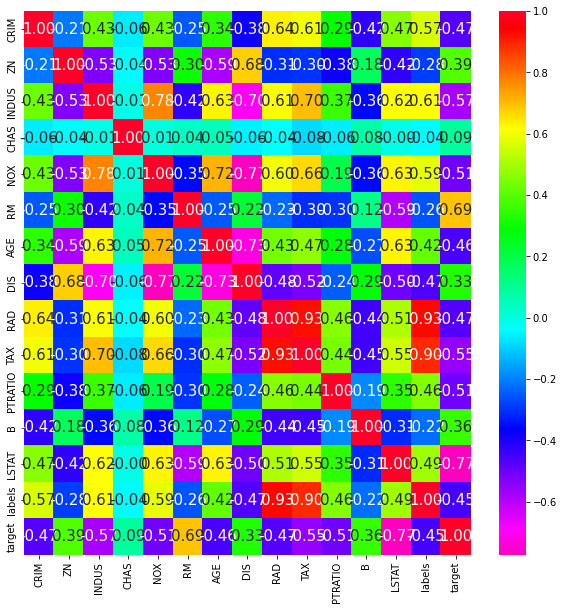

In [ ]:
import seaborn as sns
X_train11=X_train1
X_train11['target']=pd.DataFrame(y_train).values
corr = X_train11.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='gist_rainbow_r');


When looking at the correlation between  features and Clusters with Target (Price), we find that the correlation is **almost non-existent , very weak**, and since the dataset that I worked on **cannot be resolved by unsupervised learning** (K-means clustering)

And we should use **supervised learning** to make a regression and prediction.


---



---


 * #### **And now I use the predict with X_test: to predict each data sample in it for which clusters belongs to**

In [ ]:
#convert the X_test_pca1 to dataframe with clusters columns
label_test1=clust.fit_predict(X_test1)
X_test1=pd.DataFrame(X_test1)
X_test1.columns=X_train1.columns[:-2]
X_test1['Clusters']=label_test1
X_test1
print("","="*100," \n \t\t\t\t Predict for testing Done...! \t\t\t\t\n","="*100)

 				 Predict for testing Done...! 				


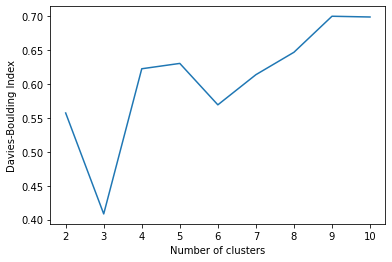

In [ ]:
from sklearn.metrics import davies_bouldin_score
results = {}
for i in range(2,11):
    kmeans1 = KMeans(n_clusters=i, random_state=30)
    labels = kmeans1.fit_predict(X_test1)
    db_index = davies_bouldin_score(X_test1, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

 **we can still observe that choosing 4 clusters minimizes the similarity measure.**

In [ ]:
# adding the target column to dataset traning
X_test11=X_test1
X_test11['target']= pd.DataFrame(y_test).values
classifair=X_train11
# update the target value to (0 or 1 or 2 or 3 or 4 or 5)
classifair['target']=np.where((classifair['target']>=0 ) & (classifair['target']<=9),0,classifair['target'])
classifair['target']=np.where((classifair['target']>9 ) & (classifair['target']<=19),1,classifair['target'])
classifair['target']=np.where((classifair['target']>19 ) & (classifair['target']<=29),2,classifair['target'])
classifair['target']=np.where((classifair['target']>29 ) & (classifair['target']<=39),3,classifair['target'])
classifair['target']=np.where((classifair['target']>39 ) & (classifair['target']<=50),4,classifair['target'])
#perform the confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion_matrix : \n\n',confusion_matrix(classifair['target'],classifair['labels']))
print('='*100)
#the main classification metrics
print('classification_report: \n\n',classification_report(classifair['target'],classifair['labels']))
print('='*100)
#Accuracy classification
print('accuracy_score \n\n :',accuracy_score(classifair['target'],classifair['labels']));

confusion_matrix : 

 [[  0   5  10   0   0]
 [ 54  19  28   0   0]
 [144   1  24   0   0]
 [ 48   0   1   0   0]
 [  9   0   0   0   0]]
classification_report: 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.76      0.19      0.30       101
         2.0       0.38      0.14      0.21       169
         3.0       0.00      0.00      0.00        49
         4.0       0.00      0.00      0.00         9

    accuracy                           0.13       343
   macro avg       0.23      0.07      0.10       343
weighted avg       0.41      0.13      0.19       343

accuracy_score 

 : 0.12536443148688048


* ### **Model Selection**
is the process of choosing one of the models as the final model that addresses the problem.
in k means clustring there is many algorithms can I use like
* **K Means Clustering**
* **hierarchical clustering**  

I use both previously and noticed both have advantages and disadvantages .
but I choose **K-means** which is a simple to implement algorithm and Scales well to unseen data points (unlike hierarchical) and generalize well to clusters of various sizes and shapes.
But one of the main disadvantages of k-means is (**the value of K has to be chosen manually**)  
 Can I solove this proplem by using the :
 * **silhouette plot**
 * **elbow method**
  and evaluet the number of K is correct by using many enalustion models like :
  
    (Davies Bouldin index : still observe that choosing k clusters minimizes the similarity measure.)
   



---



---




* ### **5-fold Cross Validation.**
A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV, and the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

**Randomly split the training dataset into k folds without replacement**.

* Outcomes: 5 models and performance estimates.

 **But in my task, I don't use it to evaluate the model because it requires supervised data with target and predicted value , and the k-means algorithm  use all the data to determine the centroids and thus the clusters.**




### **conclusion**:
We can use PCA with clustering to reduce the dimensions and choose the important columns to describe the data in the largest way, and thus we can get rid of the chaos and overlap that occurs and improve the performance of the algorithm more and see the groups clearly each group alone.

#### **Limitations**
detrmine the number of clusters.



---



---

